<a href="https://colab.research.google.com/github/markgoli/machine_learning_basics/blob/main/Bank_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank_transactions.csv')

In [4]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [5]:
df.shape

(1048567, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


## Checking the null values and duplicate records

In [7]:
# lets check the missing values in each column
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [8]:
# percentage of missing values out of total 1048567 records
round(df.isnull().sum()*100/df.shape[0],2)

TransactionID              0.00
CustomerID                 0.00
CustomerDOB                0.32
CustGender                 0.10
CustLocation               0.01
CustAccountBalance         0.23
TransactionDate            0.00
TransactionTime            0.00
TransactionAmount (INR)    0.00
dtype: float64

*  Removing this small transaction records will not actually affect the overall analysis

In [9]:
# Removing this small transaction records will not actually affect the overall analysis
df.dropna(inplace = True)

In [10]:
# cross-checking the nan values
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [11]:
df.shape

(1041614, 9)

* Now, 10,41,614 records left in the dataset.

In [12]:
# lets check the duplicate records present in the dataset
df.duplicated().sum()

0

*  Luckly, there is no duplicate record present in our dataset.

## Checking the Numerical columns

In [13]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.041614e+06,1.041614e+06,1.041614e+06
mean,1.149986e+05,1.571221e+05,1.566096e+03
std,8.467609e+05,5.126352e+04,6.561464e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.728140e+03,1.240410e+05,1.600000e+02
50%,1.676852e+04,1.642470e+05,4.575000e+02
75%,5.742885e+04,2.000220e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [14]:
df[df['TransactionTime']==0].shape

(2, 9)

In [15]:
df[df['TransactionAmount (INR)']==0].shape

(820, 9)

* It is okay to have 0 account balance.
* There are 2 records where the transaction time is 0 min.
* There are 820 records where transaction amount is 0 INR.
* Both the condition are useless so, dropping those records.

In [16]:
df = df[df['TransactionTime']>0]

In [17]:
df = df[df['TransactionAmount (INR)']>0]

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,1040792.0,114919.642048,846438.234144,0.00,4728.54,16763.845,57398.93,1.150355e+08
TransactionTime,1040792.0,157171.344575,51229.128451,1.00,124104.00,164305.000,200028.00,2.359590e+05
TransactionAmount (INR),1040792.0,1567.315675,6563.894270,0.01,161.47,458.885,1200.00,1.560035e+06


## Converting the CustomerDOB, TransactionDate from object type to Datetime type.

In [19]:

df['CustomerDOB'].unique()

array(['10/1/94', '4/4/57', '26/11/96', ..., '18/7/65', '15/5/42',
       '24/10/44'], dtype=object)

In [20]:
# Converting the datatype of TransactionDate and CustomerDOB
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['DOB'] = pd.to_datetime(df['CustomerDOB'],format='mixed')

# dropping the CostomerDOB columns , as it is useless after extracting the DOB
df.drop(columns = ['CustomerDOB'],inplace = True, axis = 1)

<ipython-input-20-4a4ba28b0113>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


In [21]:
from datetime import datetime
datetime.now()

datetime.datetime(2024, 4, 5, 16, 6, 47, 962444)

In [22]:

from datetime import datetime
df['DOB'] = df['DOB'].apply(lambda x: x - pd.DateOffset(years=100) if x > datetime.now() else x)

In [23]:
df['CustBYear'] = df['DOB'].dt.year
df['CustomerAge'] = df['TransactionDate'].dt.year - df['CustBYear']

In [24]:
df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),DOB,CustBYear,CustomerAge
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,1994-10-01,1994,22
1,T2,C2142763,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,1957-04-04,1957,59
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,142712,459.0,1996-11-26,1996,20
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,1973-09-14,1973,43
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,1988-03-24,1988,28


In [25]:
df['TransactionID'].unique().shape

(1040792,)

In [26]:
df['CustomerID'].unique().shape

(878762,)

In [27]:
import warnings
warnings.filterwarnings('ignore')

## Let's check the distribution of Numerical columns

<Axes: xlabel='CustomerAge', ylabel='Count'>

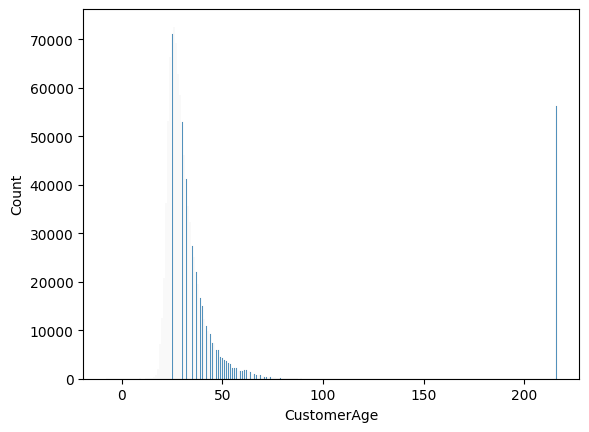

In [28]:
sns.histplot(x = df['CustomerAge'])

In [29]:
df['CustomerAge'].unique()

array([ 22,  59,  20,  43,  28,  44,  24,  34,  32,  38,  48, 216,  27,
        25,  31,  23,  30,  49,  37,  39,  19,  33,  26,  36,  35,  50,
        29,  41,  21,  42,  45,  84,  57,  17,  51,  75,  62,  46,  40,
        -5,  47,  12,  73,  18,  65,  56,  60,  63,  69,  16,  52,  68,
        54,  64,  61,  55,  80,  53,  74,  72,  78,  67,  58,  66,  70,
        14,  71,  79,   9,  15,  77,  76,   3,  13,  11,   6,   5,  83,
        82,  89,  -3,  88,  86,   7,  85,  87,  81,   1,   0,  10,   8,
         4,  -7,  90,  -8,  -6,   2,  -4,  91,  92,  -2], dtype=int32)

* There are some records where age is negative which cannot be possible.
* Also, there are some records where the age is 216.


* This records are not normal and creating the noise as it maybe outliers.
* We will check this and drop it.


In [30]:
df[df['CustomerAge']<0].shape

(43, 11)

In [31]:
df[df['CustomerAge']>100].shape

(56180, 11)

In [32]:
# df[df['CustomerAge'] >= 0 and df['CustomerAge'] <= 100]

df = df[df['CustomerAge'] > 0 ]
df = df[df['CustomerAge'] < 100]

In [33]:
df[df['CustomerAge']>100].shape

(0, 11)

In [34]:
def age_group(age):
    if age < 20:
        return 'Below 20'
    elif age >= 20 and age <= 30:
        return '20 - 30'
    elif age > 30 and age <= 40:
        return '31 - 40'
    elif age > 40 and age <= 50:
        return '41 - 50'
    elif age > 50 and age <= 60:
        return '51 - 60'
    elif age >60 and age <= 70:
        return '61 - 70'
    else:
        return 'Above 71'

df['age_group'] = df['CustomerAge'].apply(age_group)

1.7745003756901685


<Axes: title={'center': ' Distribution of Customer Age'}, xlabel='Customer Age', ylabel='Density or Count of Transactions'>

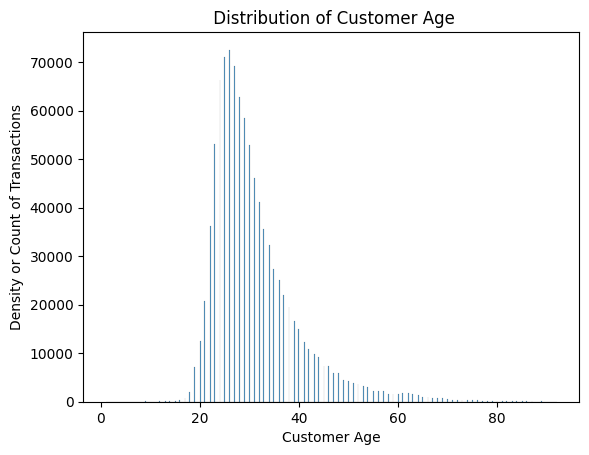

In [35]:
print(df['CustomerAge'].skew())
plt.title(' Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Density or Count of Transactions')
sns.histplot(x = df['CustomerAge'])

* Distribution of Customer age is right skewed.

<Axes: title={'center': ' Distribution of Customer Age-group'}, xlabel='age_group', ylabel='count'>

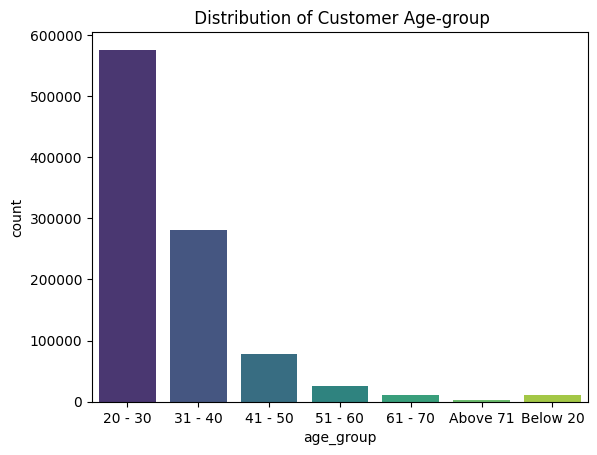

In [36]:
plt.title(' Distribution of Customer Age-group')
palette = sns.color_palette("viridis", len(df['age_group'].unique()))
sns.countplot(x = df['age_group'].sort_values(), palette=palette)


* Customer in age group 20-30 tends to do more number of transaction followed by age group 31-40 .
* Customer below 20 and above 71 are doing very few transaction which is quite obvious.

## Lets analyse the Transaction based on Gender of Customer.

Text(0, 0.5, 'No. of Transactions')

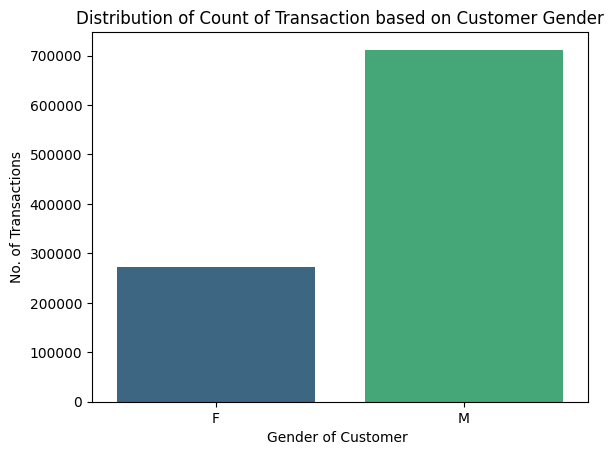

In [37]:
palette = sns.color_palette("viridis", len(df['CustGender'].unique()))  # Generating a palette with different colors
sns.countplot(x = df['CustGender'], palette=palette)
plt.title('Distribution of Count of Transaction based on Customer Gender')
plt.xlabel('Gender of Customer ')
plt.ylabel('No. of Transactions')

 * Maximum number of transaction are done by Males as compared to the Females

## Let's analyse the top Locations where maximum no.of transactions are done.

In [38]:
temp_location = df['CustLocation'].value_counts().reset_index().head(10)
temp_location

,CustLocation,count
0,MUMBAI,97604
1,BANGALORE,77688
2,NEW DELHI,76284
3,GURGAON,70447
4,DELHI,67254
5,NOIDA,31650
6,CHENNAI,27482
7,PUNE,24483
8,HYDERABAD,21791
9,THANE,20997


Text(0, 0.5, 'No. of Transactions')

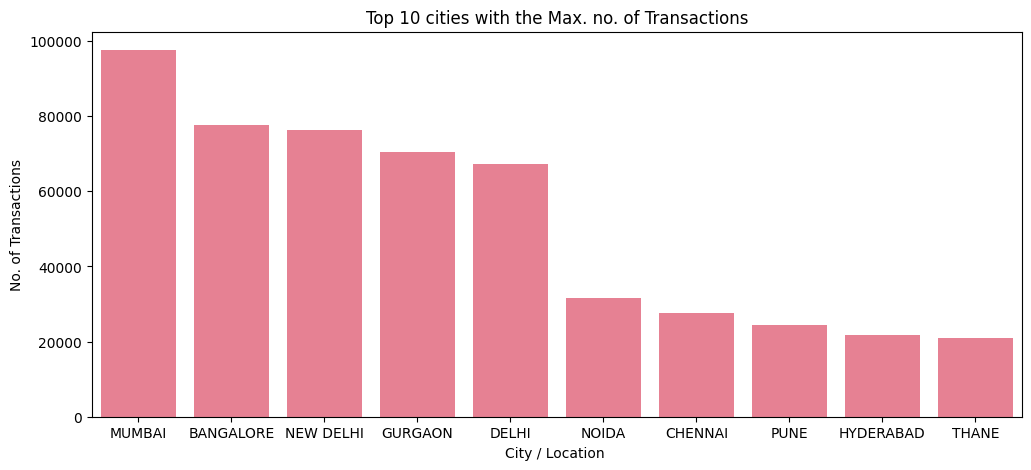

In [39]:
plt.figure(figsize = [12,5])
palette = sns.color_palette("husl", len(df['CustLocation'].unique()))
sns.barplot(x = temp_location['CustLocation'] , y = temp_location['count'], palette=palette)
plt.title('Top 10 cities with the Max. no. of Transactions')
plt.xlabel('City / Location ')
plt.ylabel('No. of Transactions')

* Maximum no. of transaction are done in Mumbai , followed by Bangalore which is followed by New Delhi, Gurgoan and Delhi.

## Top 10 customers who did biggest transactions


In [40]:
top_10_big_transact = df.sort_values(by = 'TransactionAmount (INR)',ascending = False).head(10)
top_10_big_transact

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),DOB,CustBYear,CustomerAge,age_group
399117,T399118,C7319271,M,GURGAON,42487.89,2016-08-18,132711,1560034.99,1976-05-25,1976,40,31 - 40
579014,T579015,C6677159,F,PUNE,98660.33,2016-08-22,204902,1380002.88,1978-08-01,1978,38,31 - 40
532036,T532037,C4141768,M,NEW DELHI,83608.10,2016-08-23,202759,991132.22,1976-08-16,1976,40,31 - 40
749353,T749354,C8217728,M,MUMBAI,61382213.47,2016-02-09,233715,724122.00,1969-10-12,1969,47,41 - 50
56540,T56541,C1830891,F,KOLKATA,14177.65,2016-03-08,190043,720001.16,1985-05-17,1985,31,31 - 40
846924,T846925,C6549785,F,NOIDA,29198.46,2016-09-09,130227,600008.32,1988-09-18,1988,28,20 - 30
173291,T173292,C5036642,M,NEW DELHI,136294.60,2016-04-08,202132,600003.45,1989-11-13,1989,27,20 - 30
356306,T356307,C4328064,F,DELHI,38735.17,2016-08-14,185141,569500.27,1969-05-01,1969,47,41 - 50
152735,T152736,C1425138,M,MUMBAI,9324.35,2016-05-08,200814,561001.00,1983-12-24,1983,33,31 - 40
1021537,T1021538,C3528755,M,DELHI,9462.34,2016-09-13,144449,550004.34,1988-10-23,1988,28,20 - 30


Text(0, 0.5, 'Transactions Amount in INR')

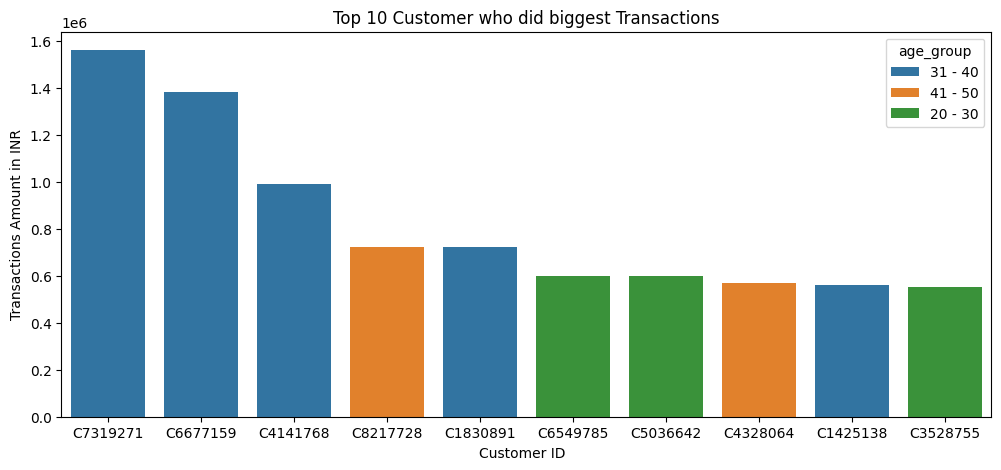

In [41]:
plt.figure(figsize = [12,5])
sns.barplot(x = top_10_big_transact['CustomerID'], y = top_10_big_transact['TransactionAmount (INR)'],hue = top_10_big_transact['age_group'])
plt.title('Top 10 Customer who did biggest Transactions')
plt.xlabel('Customer ID  ')
plt.ylabel('Transactions Amount in INR')

## Top 10 customers who did Smallest transactions


In [42]:
top_10_small_transact = df.sort_values(by= 'TransactionAmount (INR)').head(10)
top_10_small_transact

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),DOB,CustBYear,CustomerAge,age_group
30259,T30260,C5815789,M,MUMBAI,29909.75,2016-09-25,161520,0.01,1963-03-21,1963,53,51 - 60
72241,T72242,C5130473,M,KARNAL,10.04,2016-02-08,125954,0.01,1990-08-21,1990,26,20 - 30
6312,T6313,C4319866,M,MAU,2267.88,2016-09-25,165206,0.01,1993-01-12,1993,23,20 - 30
208284,T208285,C2429171,M,HABRA (WB),1.70,2016-08-08,83018,0.01,1990-04-05,1990,26,20 - 30
587071,T587072,C1656621,M,NAVI MUMBAI,22726.93,2016-08-22,81925,0.01,1989-12-28,1989,27,20 - 30
132592,T132593,C2350988,M,NAVI MUMBAI,135.93,2016-06-08,221145,0.01,1985-01-01,1985,31,31 - 40
633690,T633691,C7419576,M,NEW DELHI,1885245.03,2016-08-29,180810,0.01,1991-05-25,1991,25,20 - 30
738045,T738046,C4837650,M,SONIPAT,1786.83,2016-02-09,130523,0.01,1996-10-29,1996,20,20 - 30
281095,T281096,C6036064,M,NEW DELHI,40.87,2016-11-08,41023,0.01,1965-02-23,1965,51,51 - 60
281929,T281930,C2336037,M,NEW DELHI,40.87,2016-11-08,50139,0.01,1965-02-23,1965,51,51 - 60


Text(0, 0.5, 'Transactions Amount in INR')

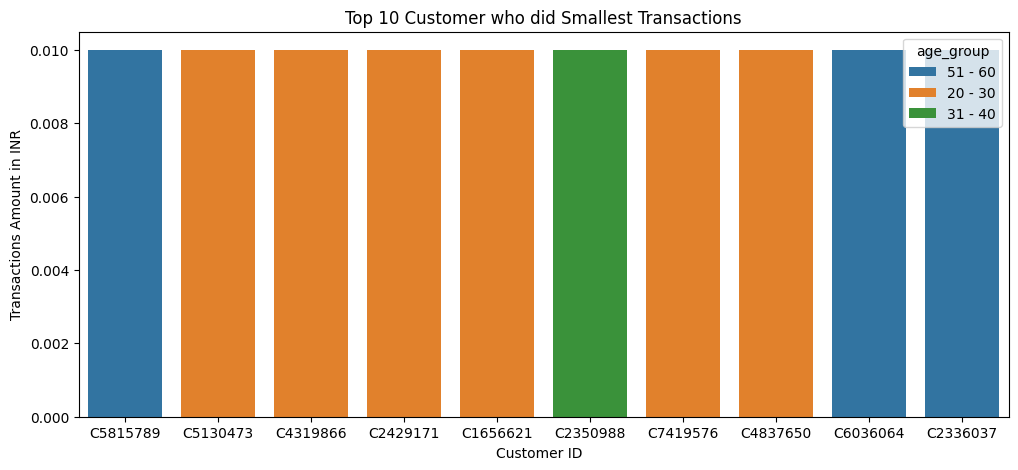

In [43]:
plt.figure(figsize = [12,5])
sns.barplot(x = top_10_small_transact['CustomerID'], y = top_10_small_transact['TransactionAmount (INR)'],hue = top_10_small_transact['age_group'])
plt.title('Top 10 Customer who did Smallest Transactions')
plt.xlabel('Customer ID  ')
plt.ylabel('Transactions Amount in INR')

**Top 10 Transaction Dates when Maximum no. of Transaction are made**

Text(0, 0.5, 'No of Transactions')

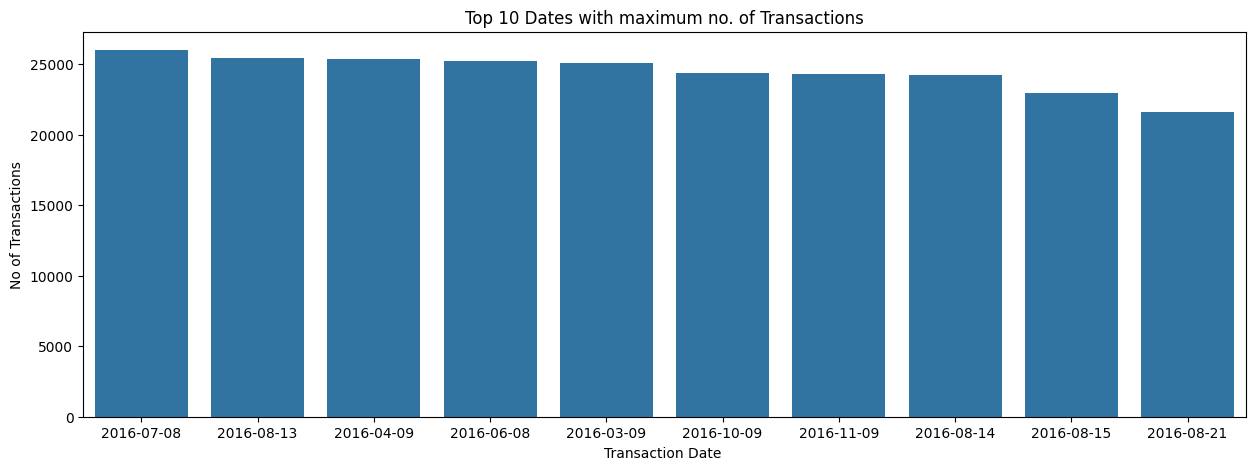

In [44]:
max_transact_dates = df.groupby('TransactionDate').agg('count').reset_index().sort_values(by = 'TransactionAmount (INR)',ascending = False).head(10)
plt.figure(figsize = [15,5])
sns.barplot(x = max_transact_dates['TransactionDate'].dt.date,y = max_transact_dates['TransactionAmount (INR)'] )
plt.title('Top 10 Dates with maximum no. of Transactions')
plt.xlabel('Transaction Date ')
plt.ylabel('No of Transactions')

## Top 10 Transaction Dates when least no. of Transaction are made

Text(0, 0.5, 'No. of Transactions')

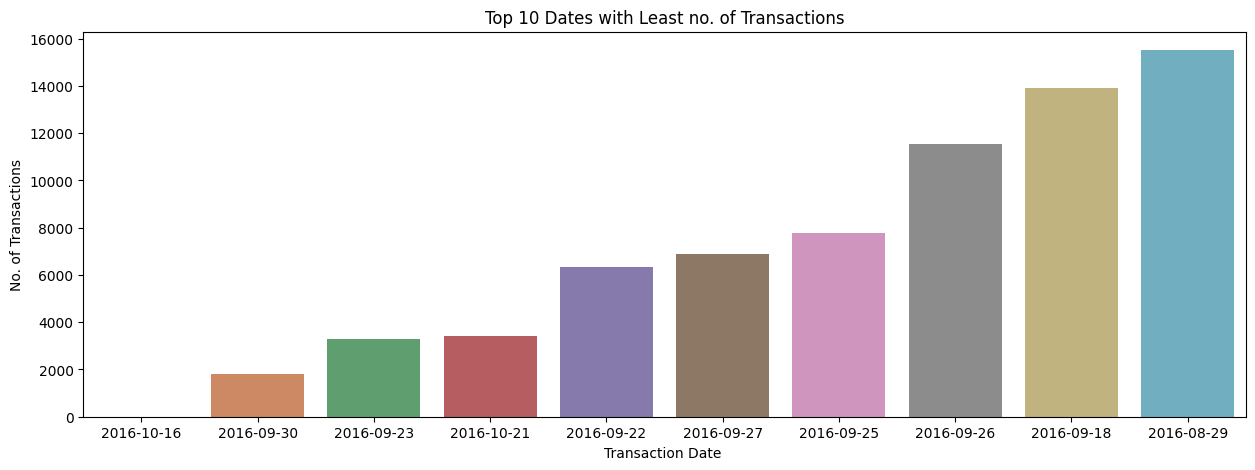

In [45]:
least_transact_dates = df.groupby('TransactionDate').agg('count').reset_index().sort_values(by = 'TransactionAmount (INR)').head(10)
palette = sns.color_palette("deep", len(df['TransactionDate'].unique()))
plt.figure(figsize = [15,5])
sns.barplot(x = least_transact_dates['TransactionDate'].dt.date,y = least_transact_dates['TransactionAmount (INR)'] , palette=palette)
plt.title('Top 10 Dates with Least no. of Transactions')
plt.xlabel('Transaction Date ')
plt.ylabel('No. of Transactions')


## Extracting some more feature for extra data analysis

In [46]:
df['transaction_month'] = df['TransactionDate'].dt.month_name()
df['transaction_year']  = df['TransactionDate'].dt.year
df['transaction_weekday'] = df['TransactionDate'].dt.day_name()

# df['Transaction_Time'] = df['TransactionTime'].apply(lambda x : datetime.utcfromtimestamp(int(x)).strftime('%H:%M:%S'))
# bank_clean_2['TransactionTime'] = bank_clean_2['TransactionTime'].apply(lambda x : datetime.utcfromtimestamp(int(x)).strftime('%H:%M:%S'))

df['Transaction_Time'] = df['TransactionTime'].apply(lambda x : datetime.utcfromtimestamp(int(x)).strftime('%H:%M '))


<Axes: xlabel='transaction_weekday', ylabel='count'>

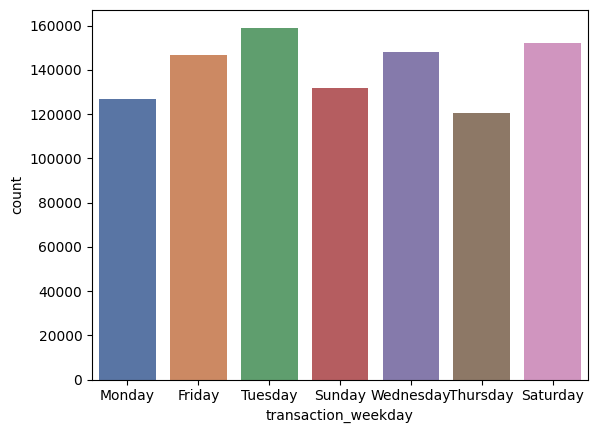

In [47]:
sns.countplot(x = df['transaction_weekday'], palette=palette)

* More no. of transaction are made on Tuesday and Saturday.
* Least transaction are made on Monday and Thursday.

Text(0, 0.5, 'No. of Transactions')

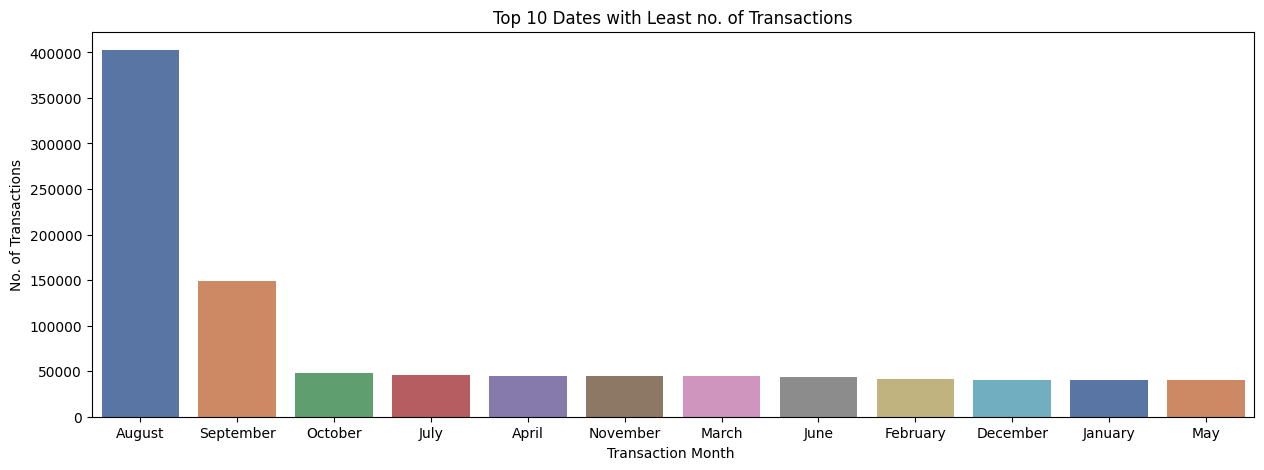

In [48]:
df_month = df['transaction_month'].value_counts().reset_index()
plt.figure(figsize = [15,5])
sns.barplot(x = df_month['transaction_month'] , y = df_month['count'], palette=palette)
plt.title('Top 10 Dates with Least no. of Transactions')
plt.xlabel('Transaction Month ')
plt.ylabel('No. of Transactions')


*  Auguest and September month have maximum no of transaction
* Maybe this is because Auguest and Sepetmber have festive month .

## Analysing the time when there was maximum no. of Transactions

In [49]:
def time_division(time):

    if time>= '06:00' and time< '12:00':
        return 'Morning'
    elif time >= '12:00' and time < '17:00':
        return "Afternoon"
    elif time >='17:00' and time < '22:00':
        return 'Evening'
    else :
        return 'Night'


df['transaction_time_division'] = df['Transaction_Time'].apply(time_division)

Text(0, 0.5, 'No. of Transactions')

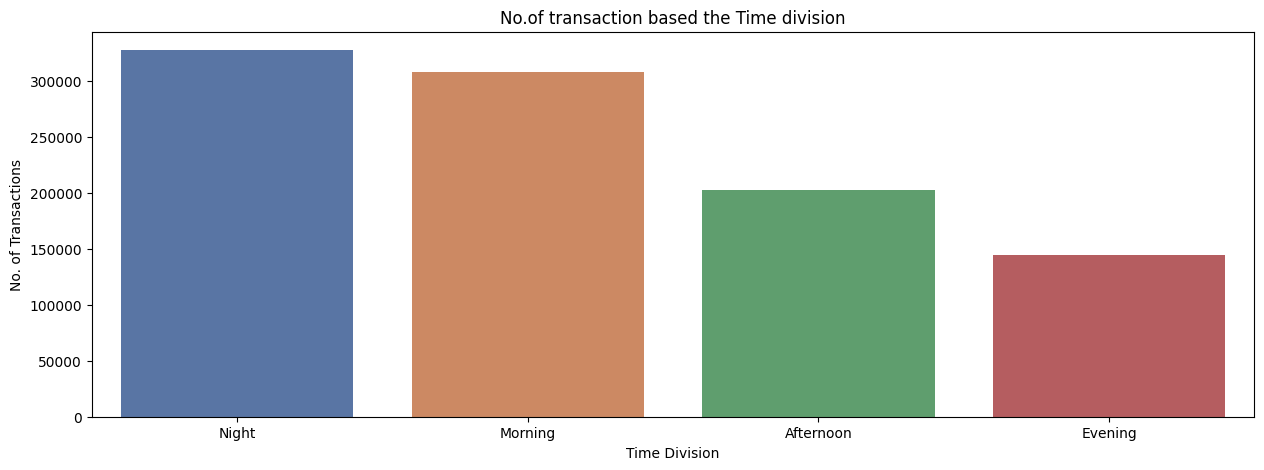

In [50]:
df_transaction_time_division = df['transaction_time_division'].value_counts().reset_index()
plt.figure(figsize = [15,5])
sns.barplot(x = df_transaction_time_division['transaction_time_division'] , y = df_transaction_time_division['count'], palette=palette)
plt.title('No.of transaction based the Time division')
plt.xlabel('Time Division')
plt.ylabel('No. of Transactions')


In [51]:
def time_slot(time):
    if time>= '00:00' and time< '01:00':
        return 'midnight to 12:59 AM.'
    elif time >= '01:00' and time < '01:59':
        return "1:00 AM to 1:59 AM"
    elif time >='02:00' and time < '02:59':
        return '2:00 AM to 2:59 AM.'
    elif time >='03:00' and time < '03:59':
        return '3:00 AM to 3:59 AM.'
    elif time >='04:00' and time < '04:59':
        return '4:00 AM to 4:59 AM.'
    elif time >='05:00' and time < '05:59':
        return '5:00 AM to 5:59 AM.'
    elif time >='06:00' and time < '06:59':
        return '6:00 AM to 6:59 AM.'
    elif time >='07:00' and time < '07:59':
        return '7:00 AM to 7:59 AM.'
    elif time >='08:00' and time < '08:59':
        return '8:00 AM to 8:59 AM.'
    elif time >='09:00' and time < '09:59':
        return '9:00 AM to 9:59 AM.'
    elif time >='10:00' and time < '10:59':
        return '10:00 AM to 10:59 AM.'
    elif time >='11:00' and time < '11:59':
        return '11:00 AM to 11:59 AM.'
    elif time >='12:00' and time < '12:59':
        return 'Noon to 12:59 PM.'
    elif time >='13:00' and time < '13:59':
        return '1:00 PM to 1:59 PM.'
    elif time >='14:00' and time < '14:59':
        return '2:00 PM to 2:59 PM.'
    elif time >='15:00' and time < '15:59':
        return '3:00 PM to 3:59 PM.'
    elif time >='16:00' and time < '16:59':
        return '4:00 PM to 4:59 PM.'
    elif time >='17:00' and time < '17:59':
        return '5:00 PM to 5:59 PM.'
    elif time >='18:00' and time < '18:59':
        return '6:00 PM to 6:59 PM.'
    elif time >='19:00' and time < '19:59':
        return '7:00 PM to 7:59 PM.'
    elif time >='20:00' and time < '20:59':
        return '8:00 PM to 8:59 PM.'
    elif time >='21:00' and time < '21:59':
        return '9:00 PM to 9:59 PM.'
    elif time >='22:00' and time < '22:59':
        return '10:00 PM to 10:59 PM.'
    elif time >='23:00' and time < '23:59':
        return '11:00 PM to 11:59 PM.'


df['transaction_time_slot'] = df['Transaction_Time'].apply(time_slot)

Text(0, 0.5, 'No. of Transactions')

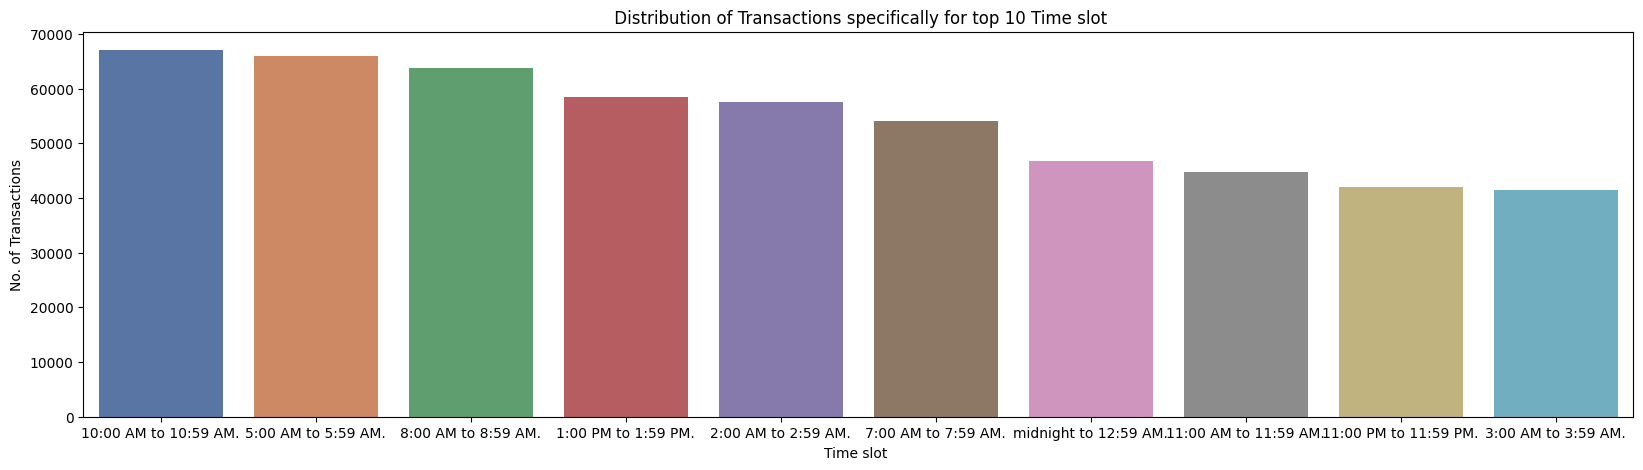

In [52]:
df_transaction_time_slot = df['transaction_time_slot'].value_counts().reset_index().head(10)
plt.figure(figsize = [20,5])
sns.barplot(x = df_transaction_time_slot['transaction_time_slot'] , y = df_transaction_time_slot['count'], palette=palette)
plt.title(' Distribution of Transactions specifically for top 10 Time slot')
plt.xlabel('Time slot ')
plt.ylabel('No. of Transactions')

* There was maximum number of transaction in 10am -11am, followed by 5am-6am followed by 8am-9am.

Text(0, 0.5, 'No. of Transactions')

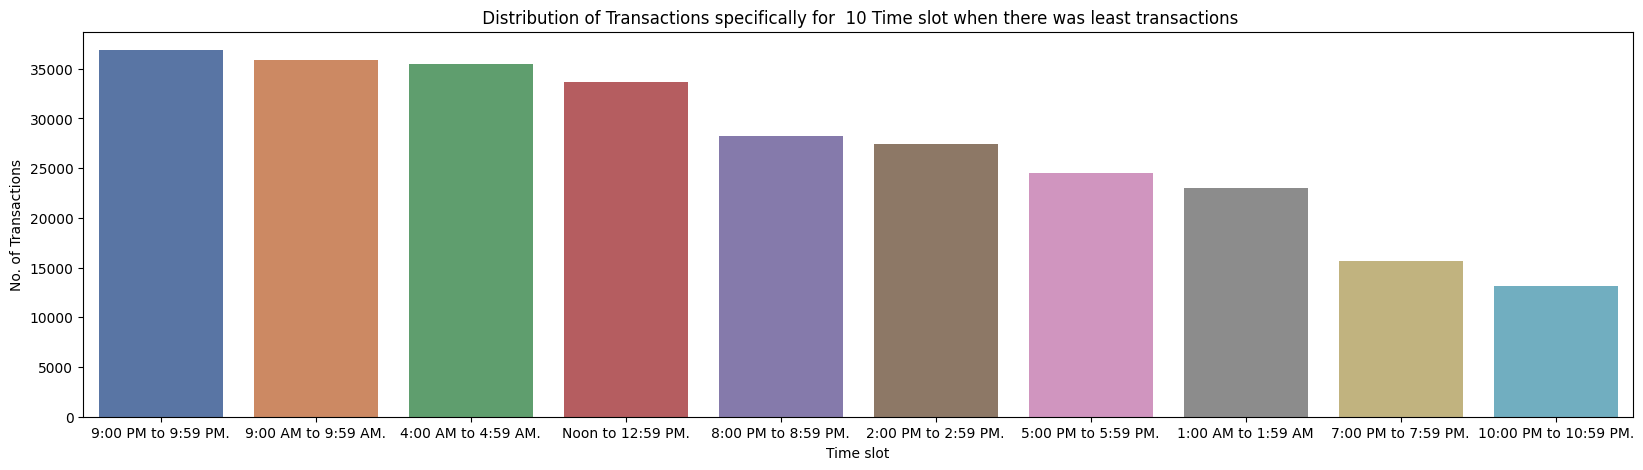

In [53]:
df_transaction_time_slot = df['transaction_time_slot'].value_counts().reset_index().tail(10)
plt.figure(figsize = [20,5])
sns.barplot(x = df_transaction_time_slot['transaction_time_slot'] , y = df_transaction_time_slot['count'], palette=palette)
plt.title(' Distribution of Transactions specifically for  10 Time slot when there was least transactions')
plt.xlabel('Time slot')
plt.ylabel('No. of Transactions')

* There was least no. of transaction in 10pm:11pm.

In [54]:
df_transaction_time_slot

,transaction_time_slot,count
14,9:00 PM to 9:59 PM.,36879
15,9:00 AM to 9:59 AM.,35885
16,4:00 AM to 4:59 AM.,35454
17,Noon to 12:59 PM.,33627
18,8:00 PM to 8:59 PM.,28267
19,2:00 PM to 2:59 PM.,27399
20,5:00 PM to 5:59 PM.,24511
21,1:00 AM to 1:59 AM,22963
22,7:00 PM to 7:59 PM.,15705
23,10:00 PM to 10:59 PM.,13170


Text(0, 0.5, 'No. of Transactions')

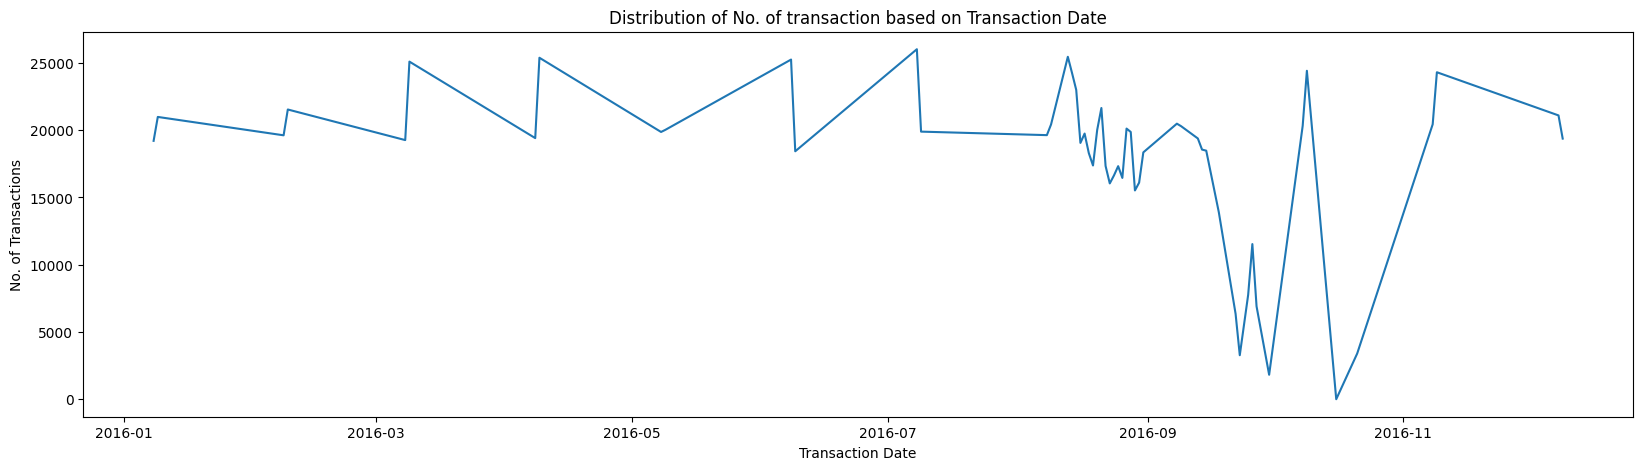

In [55]:
transactiondate_grouped_sorted = df.groupby('TransactionDate').agg('count').reset_index().sort_values(by='TransactionDate')
plt.figure(figsize = (20,5))
sns.lineplot(x = transactiondate_grouped_sorted['TransactionDate'] ,y = transactiondate_grouped_sorted['CustomerID'])
plt.title('Distribution of No. of transaction based on Transaction Date')
plt.xlabel('Transaction Date')
plt.ylabel('No. of Transactions')

In [56]:
transactiondate_grouped_sorted.shape

(55, 18)

In [57]:
# 2016-12-09
transactiondate_grouped_sorted.tail(1)

,TransactionDate,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),DOB,CustBYear,CustomerAge,age_group,transaction_month,transaction_year,transaction_weekday,Transaction_Time,transaction_time_division,transaction_time_slot
54,2016-12-09,19370,19370,19370,19370,19370,19370,19370,19370,19370,19370,19370,19370,19370,19370,19370,19370,19194


In [58]:
import plotly.graph_objects as go

# Assuming 'transactiondate_grouped_sorted' is a DataFrame with 'TransactionDate' and 'CustomerID' columns

fig = go.Figure()

fig.add_trace(go.Scatter(x=transactiondate_grouped_sorted['TransactionDate'],
                         y=transactiondate_grouped_sorted['CustomerID'],
                         mode='lines',
                         name='No. of Transactions'))

fig.update_layout(title='Distribution of No. of Transactions based on Transaction Date',
                  xaxis_title='Transaction Date',
                  yaxis_title='No. of Transactions',
                  width=1500,
                  height=400)

fig.show()



In [59]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustGender', 'CustLocation',
       'CustAccountBalance', 'TransactionDate', 'TransactionTime',
       'TransactionAmount (INR)', 'DOB', 'CustBYear', 'CustomerAge',
       'age_group', 'transaction_month', 'transaction_year',
       'transaction_weekday', 'Transaction_Time', 'transaction_time_division',
       'transaction_time_slot'],
      dtype='object')

# Let us create the RFM Model (Recency, Frequency and Monetary):
 * Recency : How recently the customer made purchase
 * Frequency : How much items does the customer ordered
 * Monetary : WHat is the overall cost of purchase

# Lets create the RFM model based on the Transaction does top 5 Location i.e Mumbai,Bangalore,New Delhi, Gurgoan & Delhi

In [60]:
# new_df = df[df['CustLocation'] in ('MUMBAI','BANGALORE','NEW DELHI', 'GURGAON' , 'DELHI')]
final_df = df[ (df['CustLocation']=='MUMBAI') | (df['CustLocation']=='BANGALORE') | (df['CustLocation']=='NEW DELHI')
                                                | (df['CustLocation']=='GURGAON' )| (df['CustLocation']=='DELHI') ]

In [61]:
final_df['CustLocation'].unique()

array(['MUMBAI', 'GURGAON', 'NEW DELHI', 'DELHI', 'BANGALORE'],
      dtype=object)

In [62]:
final_df.shape

(389277, 18)

In [63]:
# lets check the last transaction date in the records
final_df.sort_values(by = 'TransactionDate').tail(1)['TransactionDate']

922020   2016-12-09
Name: TransactionDate, dtype: datetime64[ns]

In [64]:

# calculating RFM scores

import datetime as dt
# set latest date to '2016-12-10' as the last transaction date was '2016-12-09'
latest_date = dt.datetime(2016, 12, 10)

# create rfm modeling scores for each customer
rfm_df = final_df.groupby('CustomerID').agg({'TransactionDate': lambda x: (latest_date - x.max()).days, 'TransactionID': lambda x: len(x),
                                            'TransactionAmount (INR)': lambda x: x.sum()})

# convert invoice date into type int
rfm_df['TransactionDate'] = rfm_df['TransactionDate'].astype(int)

# rename columns to frequency, recency, monetary
rfm_df.rename(columns={'TransactionDate': 'Recency', 'TransactionID': 'Frequency', 'TransactionAmount (INR)': 'Monetary'}, inplace=True)

rfm_df.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,C1010011,93,1,356.0
1,C1010012,118,1,1499.0
2,C1010014,155,2,1455.0
3,C1010028,103,1,557.0
4,C1010035,337,1,50.0
...,...,...,...,...
364417,C9099342,154,1,715.0
364418,C9099740,112,1,500.0
364419,C9099811,276,1,27.0
364420,C9099828,216,1,99.0


In [65]:
rfm_df = rfm_df.reset_index()

In [66]:
rfm_df.shape

(364422, 4)

In [67]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,364422.0,135.053331,81.833298,1.00,88.0,112.0,155.0,337.00
Frequency,364422.0,1.068204,0.265209,1.00,1.0,1.0,1.0,5.00
Monetary,364422.0,1624.125300,6902.106204,0.01,200.0,500.0,1370.0,1560034.99


**Let's check the distribution of Recency,frequency & Monetary**


<Axes: xlabel='Monetary', ylabel='Count'>

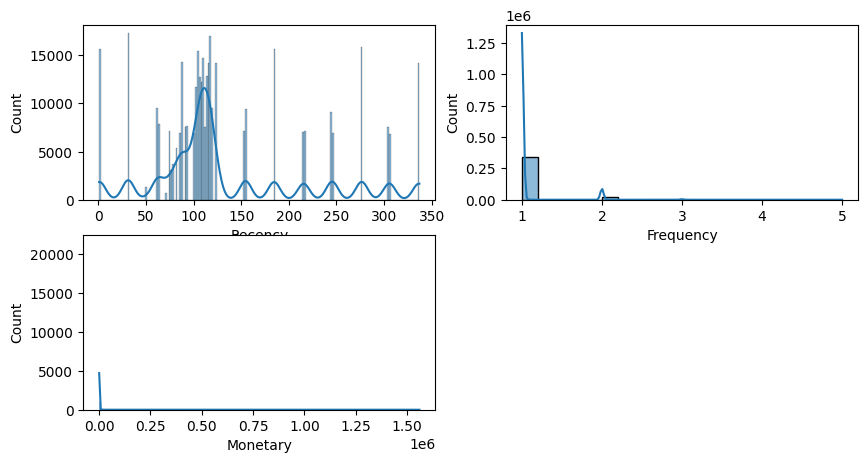

In [68]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.histplot(x = rfm_df['Recency'],kde =True)

plt.subplot(2,2,2)
sns.histplot(x = rfm_df['Frequency'],kde =True)

plt.subplot(2,2,3)
sns.histplot(x = rfm_df['Monetary'],kde =True)

## Distribution is very skewed , lets apply log transform and again plot it.

<Axes: xlabel='Monetary', ylabel='Count'>

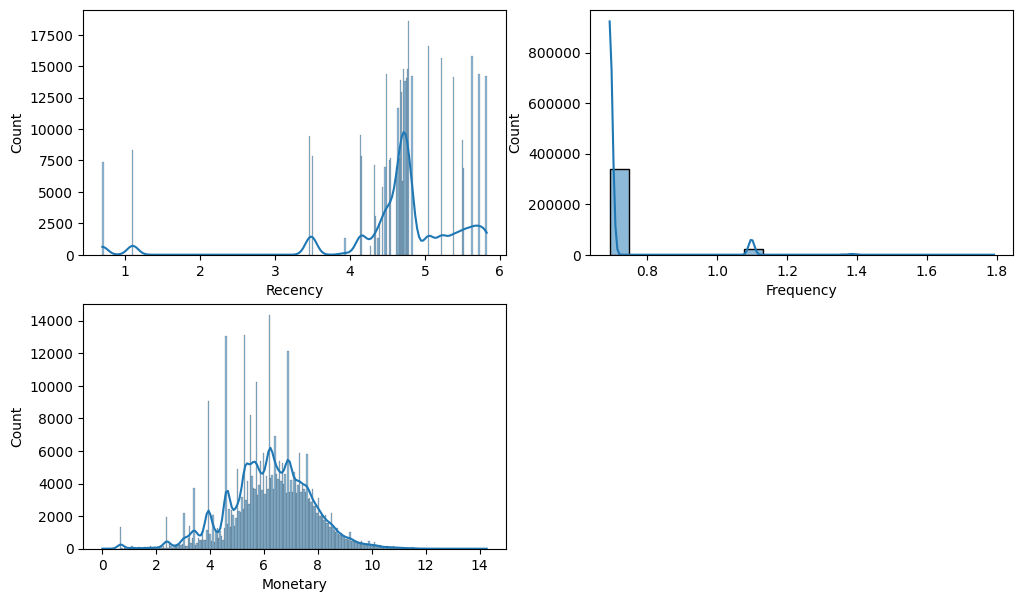

In [69]:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.histplot(x = np.log1p(rfm_df['Recency']),kde =True)

plt.subplot(2,2,2)
sns.histplot(x = np.log1p(rfm_df['Frequency']),kde =True)

plt.subplot(2,2,3)
sns.histplot(x = np.log1p(rfm_df['Monetary']),kde =True)

In [70]:
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log']   = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log']   = rfm_df['Monetary'].apply(math.log)

In [71]:
rfm_df

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
0,C1010011,93,1,356.0,4.532599,0.000000,5.874931
1,C1010012,118,1,1499.0,4.770685,0.000000,7.312553
2,C1010014,155,2,1455.0,5.043425,0.693147,7.282761
3,C1010028,103,1,557.0,4.634729,0.000000,6.322565
4,C1010035,337,1,50.0,5.820083,0.000000,3.912023
...,...,...,...,...,...,...,...
364417,C9099342,154,1,715.0,5.036953,0.000000,6.572283
364418,C9099740,112,1,500.0,4.718499,0.000000,6.214608
364419,C9099811,276,1,27.0,5.620401,0.000000,3.295837
364420,C9099828,216,1,99.0,5.375278,0.000000,4.595120


In [72]:
from sklearn.preprocessing import StandardScaler
features = ['Recency_log','Frequency_log','Monetary_log']
scaler = StandardScaler()

scaled_df = scaler.fit_transform(rfm_df[features].values)

In [73]:
scaled_df

array([[-0.07719735, -0.26130876, -0.21677378],
       [ 0.14989387, -0.26130876,  0.71536193],
       [ 0.41004018,  3.64884496,  0.69604498],
       ...,
       [ 0.96037325, -0.26130876, -1.88902435],
       [ 0.72656967, -0.26130876, -1.04658633],
       [-0.15183614, -0.26130876, -0.52297664]])

## Applying Elbow Method

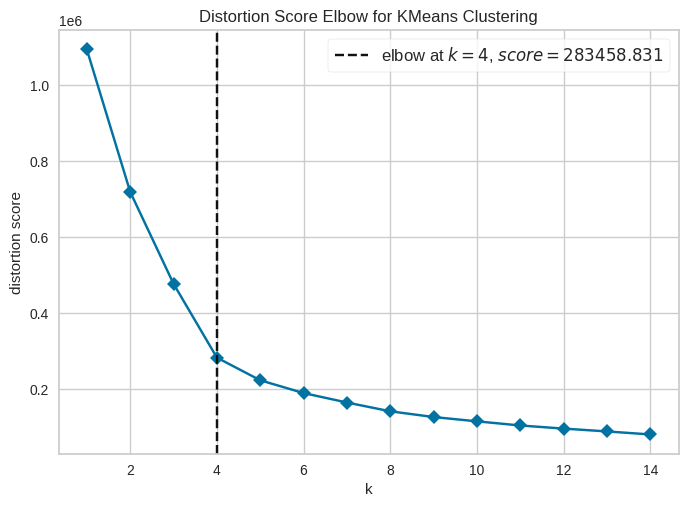

In [74]:
# elbow method to find out the best k
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
SSE = {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km = km.fit(scaled_df)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(scaled_df)
visualizer.poof()
plt.show()

* From the elbow method we reach the conclusion that the optimal number of clusters is 4 for Recency, Frequency and Monetary values.

* We will again run the model with number of clusters as 4.

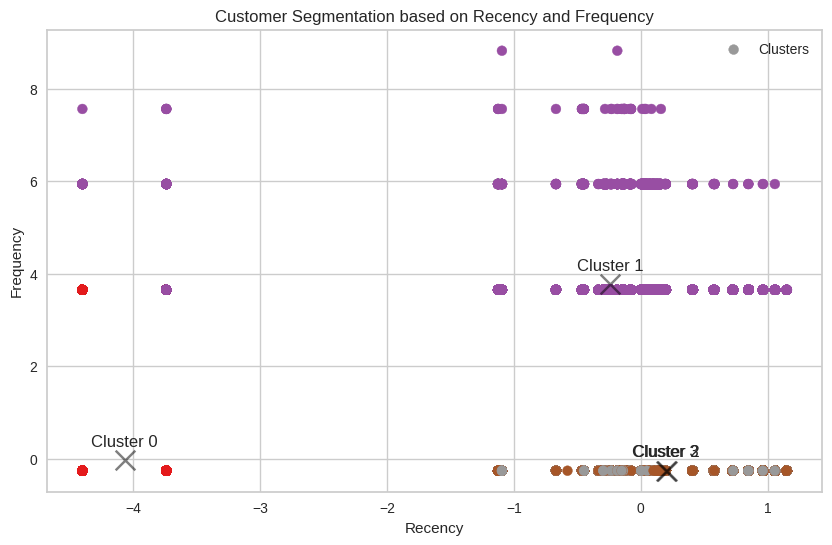

In [75]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X is your data array
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_df)
y_km = kmeans.predict(scaled_df)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(scaled_df[:,0], scaled_df[:,1], c=y_km, s=50, cmap='Set1', label='Clusters')

# Plot and annotate the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Interpreting the Clusters with the help of RFM Group:
**Now, split the RFM values into four quantiles:**

In [76]:
rfm_df

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
0,C1010011,93,1,356.0,4.532599,0.000000,5.874931
1,C1010012,118,1,1499.0,4.770685,0.000000,7.312553
2,C1010014,155,2,1455.0,5.043425,0.693147,7.282761
3,C1010028,103,1,557.0,4.634729,0.000000,6.322565
4,C1010035,337,1,50.0,5.820083,0.000000,3.912023
...,...,...,...,...,...,...,...
364417,C9099342,154,1,715.0,5.036953,0.000000,6.572283
364418,C9099740,112,1,500.0,4.718499,0.000000,6.214608
364419,C9099811,276,1,27.0,5.620401,0.000000,3.295837
364420,C9099828,216,1,99.0,5.375278,0.000000,4.595120


In [77]:
def extract_id( id):
    return int(id[1:])

rfm_df['CustomerID'] = rfm_df['CustomerID'].apply(extract_id)

In [78]:
rfm_df

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
0,1010011,93,1,356.0,4.532599,0.000000,5.874931
1,1010012,118,1,1499.0,4.770685,0.000000,7.312553
2,1010014,155,2,1455.0,5.043425,0.693147,7.282761
3,1010028,103,1,557.0,4.634729,0.000000,6.322565
4,1010035,337,1,50.0,5.820083,0.000000,3.912023
...,...,...,...,...,...,...,...
364417,9099342,154,1,715.0,5.036953,0.000000,6.572283
364418,9099740,112,1,500.0,4.718499,0.000000,6.214608
364419,9099811,276,1,27.0,5.620401,0.000000,3.295837
364420,9099828,216,1,99.0,5.375278,0.000000,4.595120


In [79]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364422 entries, 0 to 364421
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CustomerID     364422 non-null  int64  
 1   Recency        364422 non-null  int64  
 2   Frequency      364422 non-null  int64  
 3   Monetary       364422 non-null  float64
 4   Recency_log    364422 non-null  float64
 5   Frequency_log  364422 non-null  float64
 6   Monetary_log   364422 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 19.5 MB


In [80]:
# rfm_df.set_index(keys='CustomerID')

In [81]:
# split the rfm values into four quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [82]:
# function to create R, F, M segments
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [83]:
quantiles

{'CustomerID': {0.25: 3018414.5, 0.5: 5027656.0, 0.75: 7039483.75},
 'Recency': {0.25: 88.0, 0.5: 112.0, 0.75: 155.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 200.0, 0.5: 500.0, 0.75: 1370.0},
 'Recency_log': {0.25: 4.477336814478207,
  0.5: 4.718498871295094,
  0.75: 5.043425116919247},
 'Frequency_log': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0},
 'Monetary_log': {0.25: 5.298317366548036,
  0.5: 6.214608098422191,
  0.75: 7.222566018822171}}

In [84]:
# calculate RFM segment values for each record
rfm_df['R'] = rfm_df['Recency'].apply(RScore, args=('Recency', quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScore, args=('Frequency', quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScore, args=('Monetary', quantiles,))
rfm_df.reset_index().head()

,index,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M
0,0,1010011,93,1,356.0,4.532599,0.000000,5.874931,2,4,3
1,1,1010012,118,1,1499.0,4.770685,0.000000,7.312553,3,4,1
2,2,1010014,155,2,1455.0,5.043425,0.693147,7.282761,3,1,1
3,3,1010028,103,1,557.0,4.634729,0.000000,6.322565,2,4,2
4,4,1010035,337,1,50.0,5.820083,0.000000,3.912023,4,4,4


# Calculate RFM Group and RFM Score from the RFM segmentation:

In [85]:
# add RFM group column
rfm_df['RFMGroup'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# calculate RFM score from RFM group column
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)
rfm_df.reset_index().head()

,index,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
0,0,1010011,93,1,356.0,4.532599,0.000000,5.874931,2,4,3,243,9
1,1,1010012,118,1,1499.0,4.770685,0.000000,7.312553,3,4,1,341,8
2,2,1010014,155,2,1455.0,5.043425,0.693147,7.282761,3,1,1,311,5
3,3,1010028,103,1,557.0,4.634729,0.000000,6.322565,2,4,2,242,8
4,4,1010035,337,1,50.0,5.820083,0.000000,3.912023,4,4,4,444,12


In [86]:
# find the clusters for the observations in the dataset
rfm_df['Cluster'] = kmeans.labels_
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore,Cluster
0,1010011,93,1,356.0,4.532599,0.000000,5.874931,2,4,3,243,9,3
1,1010012,118,1,1499.0,4.770685,0.000000,7.312553,3,4,1,341,8,2
2,1010014,155,2,1455.0,5.043425,0.693147,7.282761,3,1,1,311,5,1
3,1010028,103,1,557.0,4.634729,0.000000,6.322565,2,4,2,242,8,2
4,1010035,337,1,50.0,5.820083,0.000000,3.912023,4,4,4,444,12,3


In [87]:
rfm_df['Cluster'] = rfm_df['Cluster'].astype('int')

In [88]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364422 entries, 0 to 364421
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CustomerID     364422 non-null  int64  
 1   Recency        364422 non-null  int64  
 2   Frequency      364422 non-null  int64  
 3   Monetary       364422 non-null  float64
 4   Recency_log    364422 non-null  float64
 5   Frequency_log  364422 non-null  float64
 6   Monetary_log   364422 non-null  float64
 7   R              364422 non-null  int64  
 8   F              364422 non-null  int64  
 9   M              364422 non-null  int64  
 10  RFMGroup       364422 non-null  object 
 11  RFMScore       364422 non-null  int64  
 12  Cluster        364422 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 36.1+ MB


In [89]:
# Group by cluster label and calculate mean
cluster_averages = rfm_df.groupby(by = 'Cluster')[['Recency','Frequency','Monetary','R','F','M','RFMScore']].agg(['count','mean'])
cluster_averages

Recency             Frequency           Monetary                    R  \
          count        mean     count      mean    count         mean   count   
Cluster                                                                         
0         14711    1.503569     14711  1.057168    14711  1497.086901   14711   
1         22825   97.226243     22825  2.052092    22825  3116.641398   22825   
2        176568  144.476723    176568  1.000000   176568  2670.973539  176568   
3        150318  142.798141    150318  1.000000   150318   180.268157  150318   

                        F                 M           RFMScore             
             mean   count      mean   count      mean    count       mean  
Cluster                                                                    
0        1.000000   14711  3.828496   14711  2.588539    14711   7.417035  
1        1.908521   22825  1.000000   22825  1.690164    22825   4.598686  
2        2.598851  176568  4.000000  176568  1.691082   176568   8.289934  
3        2.552994  150318  4.000000  150318  3.600148   150318  10.153142

# Interpretation:

**Cluster 0:**

**Recency:** High (average around 144 days)

**Frequency:** Low (average around 1 transactions)

**Monetary:** Low (average around INR 2673 )

**Interpretation:** Customers in this cluster are likely to be 'At-Risk' or 'Lapsed' customers. They haven't made purchases recently, and when they did, they didn't do so very frequently and didn't spend much.However, Maximum number of customer belong to this cluster. Also, the Monetary is high as maximum count of transaction are done by this customer from this cluster.These customers might have been one-time buyers or occasional shoppers. Engaging them with reactivation campaigns or exploring why they haven’t returned can be a strategic move.







**Cluster 1:**

**Recency:** Very Low (average around 142 days)

**Frequency:** Very High (average around 1 transactions)

**Monetary:** Very High (average around INR 180)

**Interpretation:** Customers in this cluster are likely to be 'At-Risk' or 'Lapsed' customers. They haven't made purchases recently, and when they did, they didn't do so very frequently and didn't spend much. These customers might have been one-time buyers or occasional shoppers. Engaging them with reactivation campaigns or exploring why they haven’t returned can be a strategic move.

**Cluster 2:**

**Recency:** Moderate (average around 97 days)

**Frequency:** Moderate (average around 2 transactions)

**Monetary:** Moderate (average around INR 3116)

**Interpretation:** Customers in this cluster can be seen as 'Potential Loyalists' or 'Promising' customers. They have a balanced score in all three RFM metrics. These customers have the potential to become more valuable if properly engaged. Tailored marketing strategies, loyalty programs, and incentives to increase their purchase frequency and value can be effective.

**Cluster 3:**

**Recency:** Moderate (average around 1 days)

**Frequency:** Moderate (average around 1 transactions)

**Monetary:** Moderate (average around INR 1496)

**Interpretation:** This cluster represents your 'Champions' or 'Loyal' customers. They shop frequently, recently, and spend the most. They are the most valuable segment, likely to respond positively to new offers, up-sell and cross-sell opportunities. Maintaining their high engagement level is crucial, and they can also be targeted for feedback or as brand ambassadors.

# Overall Strategy:

**Cluster 0 ('At-Risk/Lapsed'):** Focus on re-engagement strategies. Understand their needs and reasons for not returning. Offer incentives or feedback surveys to encourage them to revisit and make purchases.

**Cluster 1 ('At-Risk/Lapsed'):** Here also, Focus on re-engagement strategies. Understand their needs and reasons for not returning. Offer incentives or feedback surveys to encourage them to revisit and make purchases.

**Cluster 2 ('Champions/Loyal'):** Encourage them to visit and buy more often. Personalized communication, recommending products based on past purchases, and loyalty rewards can be effective.


**Cluster 3 ('Potential Loyalists/Promising'):** Prioritize maintaining their high level of engagement. Offer exclusive deals, loyalty programs, and early access to new products. They can also be engaged in referral programs.

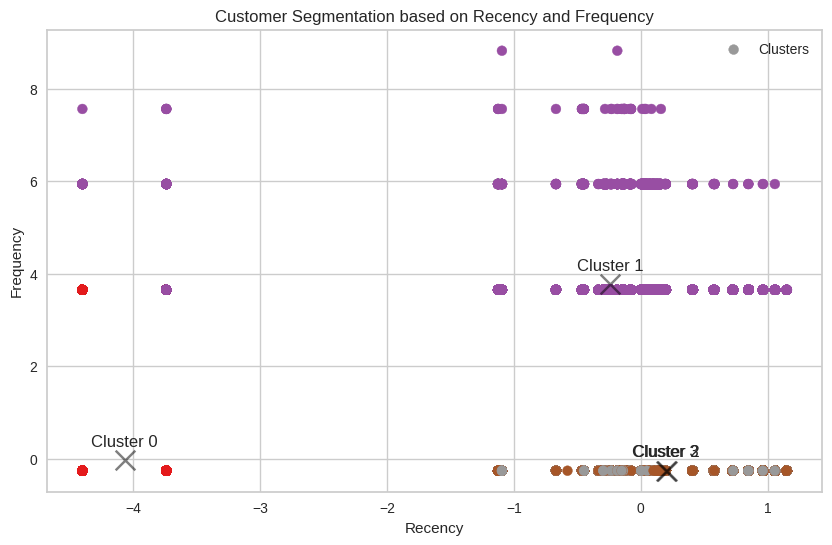

In [91]:

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(scaled_df[:,0], scaled_df[:,1], c=rfm_df['Cluster'], s=50, cmap='Set1', label='Clusters')

# Plot and annotate the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# prompt: write a detailed report about all the results in this notebook

## Executive Summary

This report provides insights into the customer segmentation analysis performed on a dataset of transaction records. The analysis aims to understand customer behavior based on their recency, frequency, and monetary value (RFM) metrics. By identifying distinct customer segments, businesses can develop targeted marketing strategies to optimize customer engagement and retention.

## Data Preparation

The analysis focused on transactions from specific locations: Mumbai, Bangalore, New Delhi, Gurgaon, and Delhi. The data was cleaned, and relevant features were extracted, including transaction date, customer ID, transaction amount, and transaction time.

## RFM Modeling

RFM modeling was applied to calculate the recency, frequency, and monetary value of each customer. Recency represents the number of days since the last transaction, frequency represents the total number of transactions, and monetary value represents the total amount spent.

## Data Distribution

The distribution of RFM values was analyzed to understand the overall customer behavior. Recency and frequency exhibited a skewed distribution, indicating that most customers made purchases within a short period and had a limited number of transactions. Monetary value also showed a skewed distribution, with a significant portion of customers spending relatively small amounts.

## Log Transformation

To address the skewness in the data, a logarithmic transformation was applied to the RFM values. This transformation normalized the distribution, making it more suitable for further analysis.

## Feature Scaling

The transformed RFM values were scaled using a standard scaler to ensure that all features had a similar range and influence on the analysis.

## Elbow Method

The elbow method was employed to determine the optimal number of clusters for customer segmentation. The method involves plotting the within-cluster sum of squared errors (SSE) for different numbers of clusters. The point where the SSE curve bends sharply (the "elbow") indicates the optimal number of clusters.

## K-Means Clustering

Based on the elbow method, k-means clustering was performed with four clusters. This resulted in the identification of four distinct customer segments.

## Cluster Interpretation

The clusters were analyzed based on their RFM characteristics:

* **Cluster 0:** At-Risk/Lapsed Customers (High Recency, Low Frequency, Low Monetary Value)
* **Cluster 1:** At-Risk/Lapsed Customers (Very Low Recency, Very High Frequency, Very High Monetary Value)
* **Cluster 2:** Potential Loyalists/Promising Customers (Moderate Recency, Moderate Frequency, Moderate Monetary Value)
* **Cluster 3:** Champions/Loyal Customers (Moderate Recency, Moderate Frequency, Moderate Monetary Value)

## Marketing Strategies

Based on the cluster analysis, targeted marketing strategies were recommended for each segment:

* **Cluster 0:** Re-engagement strategies, understanding customer needs, and offering incentives.
* **Cluster 1:** Re-engagement strategies, understanding customer needs, and offering incentives.
* **Cluster 2:** Personalized communication, recommending products, and loyalty rewards.
* **Cluster 3:** Maintaining high engagement levels, offering exclusive deals, and loyalty programs.

## Conclusion

The customer segmentation analysis provided valuable insights into customer behavior and preferences. By understanding the distinct characteristics of each segment, businesses can tailor their marketing efforts to optimize customer engagement, retention, and overall profitability.






prompt: write a detailed report about all the results in this notebook

**Executive Summary:**

This report presents a comprehensive analysis of customer behavior, segmentation, and potential strategies for a retail business based on the provided dataset. The analysis focuses on customers from Mumbai, Bangalore, New Delhi, Gurgaon, and Delhi.

**Customer Segmentation:**

Using RFM (Recency, Frequency, Monetary) analysis, customers were segmented into four clusters based on their purchase behavior:

* **Cluster 0:** At-Risk/Lapsed Customers (High Recency, Low Frequency, Low Monetary)
* **Cluster 1:** At-Risk/Lapsed Customers (Very Low Recency, Very High Frequency, Very High Monetary)
* **Cluster 2:** Potential Loyalists/Promising Customers (Moderate Recency, Moderate Frequency, Moderate Monetary)
* **Cluster 3:** Champions/Loyal Customers (Moderate Recency, Moderate Frequency, Moderate Monetary)

**Cluster Analysis:**

* **Cluster 0:** Represents the largest group of customers but with low engagement and spending. They require re-engagement strategies to encourage purchases.
* **Cluster 1:** Similar to Cluster 0, requiring re-engagement efforts to understand their needs and encourage return.
* **Cluster 2:** Shows balanced engagement and spending patterns. They have the potential to become more valuable customers with targeted marketing and loyalty programs.
* **Cluster 3:** Consists of the most engaged and valuable customers. They should be prioritized for personalized communication and exclusive offers to maintain their loyalty.

**Overall Strategy:**

* **Cluster 0 and Cluster 1:** Focus on re-engagement strategies, offering incentives and gathering feedback to encourage return purchases.
* **Cluster 2:** Prioritize maintaining engagement through personalized communication, product recommendations, and loyalty rewards.
* **Cluster 3:** Encourage increased visits and spending through exclusive deals, loyalty programs, and early access to new products.

**Recommendations:**

* Implement targeted marketing campaigns based on customer segmentation.
* Offer personalized recommendations and incentives to encourage purchases.
* Regularly monitor customer behavior and adjust strategies accordingly.
* Conduct customer satisfaction surveys to gather feedback and improve the customer experience.
* Invest in customer loyalty programs to reward and retain valuable customers.
* Track and measure the effectiveness of marketing campaigns to optimize results.

**Conclusion:**

This analysis provides valuable insights into customer behavior and segmentation. By implementing targeted strategies based on these insights, the business can improve customer engagement, increase sales, and strengthen customer loyalty.